# How to remotely access NASA GES_DISC time aggregations
#### trimmed down from [example](https://disc.gsfc.nasa.gov/information/howto?title=How%20to%20remotely%20access%20MERRA-2%20with%20Python3%20and%20calculate%20monthly%20average%20surface%20PM2.5%20for%20world%20countries)

### Procedures ###

0. set up permissions using your Earthdata credentials, in home directory: 

    - echo "machine urs.earthdata.nasa.gov login LOGIN password PASSWORD" >> ~/.netrc

    - touch ~/.urs_cookies
    
    - add these to ~/.dodsrc as explained [here](https://disc.gsfc.nasa.gov/data-access)

Import xarray

In [17]:
import xarray as xr

# Get URL of dataset (a GDS or THREDDS aggregation)

This is a lazy read: metadata only until data are needed. To get the magic string, extract an OpenDAP URL from these catalogs: 

### Time-aggregated MERRA2 collections:

3D: [THREDDS](https://goldsmr5.gesdisc.eosdis.nasa.gov/thredds/catalog.html), [GDS](https://goldsmr5.gesdisc.eosdis.nasa.gov/dods/)

2D: [THREDDS](https://goldsmr4.gesdisc.eosdis.nasa.gov/thredds/catalog.html), [GDS](https://goldsmr4.gesdisc.eosdis.nasa.gov/dods/)

### Time-aggregated GPM/IMERG rainfall:
[THREDDS](https://gpm1.gesdisc.eosdis.nasa.gov/thredds/catalog/aggregation/catalog.html), [GDS](https://gpm1.gesdisc.eosdis.nasa.gov/dods/)

#### For GDS, click `info` and copy-paste the URL from the top line. 

#### For THREDDS, keep clicking until you see 

**Access:**
1. OPENDAP: /thredds/...

Right-clicking that /thredds/... hyperlink will allow you to copy the full URL (starting from http). Trim off the .html at the end. 

In [35]:
%%time

# URL to remotely access
# NASA THREDDS data server (TDS) URLs
URL = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/thredds/dodsC/MERRA2_MONTHLY_aggregation/M2TMNXAER.5.12.4_Aggregation.ncml' # aerosol
URL = 'https://gpm1.gesdisc.eosdis.nasa.gov/thredds/dodsC/aggregation/GPM_3IMERGM.06/GPM_3IMERGM.06_Aggregation.ncml.ncml' # GPM monthly
URL = 'https://gpm1.gesdisc.eosdis.nasa.gov/dods/GPM_3IMERGDF_06' # GPM daily on GDS server
# Read the data 
ds = xr.open_dataset(URL)
ds

CPU times: user 3.33 s, sys: 12.6 ms, total: 3.35 s
Wall time: 3.35 s


<xarray.Dataset>
Dimensions:    (time: 7792, lat: 1800, lon: 3600)
Coordinates:
  * time       (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lat        (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon        (lon) float64 -179.9 -179.8 -179.8 -179.7 ... 179.8 179.8 179.9
Data variables:
    hqprecip   (time, lat, lon) float32 ...
    precipcal  (time, lat, lon) float32 ...
Attributes:
    title:        GPM Level 3 IMERG Final V06 Daily 0.1 x 0.1 degree Precipit...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Mon Feb 21 17:32:45 GMT 2022 : imported by GrADS Data Serve...

In [29]:
# ds2 = ds.transpose('time', 'nv', 'lat', 'lon') needed for sideways grid of THREDDS monthly 

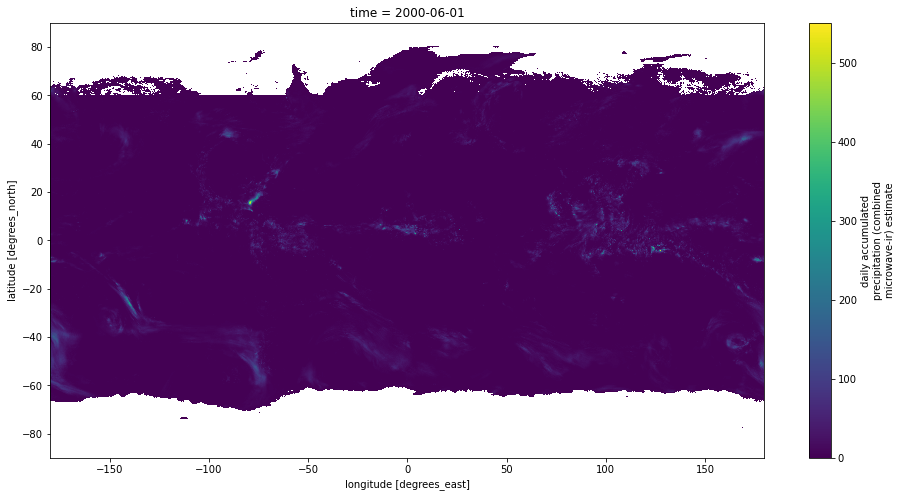

In [34]:
# Quick test plot of the first time level
ds.precipcal[0].plot(size=8, aspect=2)

# dataset in hand! 
#### Lazy read only gets actual data for a final request, for calculations or plots
#### CAREFUL! Don't request the whole dataset! It will hang up your job forever

xarray resources (subsetting and slicing) are plentiful, for instance see their [how do i...](https://xarray.pydata.org/en/stable/howdoi.html) has many examples

See fuller example linked at top here for specific example